In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# pip install opendatasets

In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
# import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# # 7a4d1b96a143394c44a7ce904b16f644
# kaggle_link = "https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset"
# od.download(kaggle_link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: katikapallilokesh
Your Kaggle Key: ··········


100%|██████████| 2.04G/2.04G [00:26<00:00, 81.5MB/s]

# PlantVillage Dataset

## Part 1

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/Corn___healthy.zip (Unzipped Files)"
list(f.name for f in os.scandir(path) if f.is_dir())

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___healthy',
 'Apple___Cedar_apple_rust',
 'Blueberry___healthy',
 'Cherry___Powdery_mildew',
 'Cherry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___healthy']

In [ ]:
# Define the paths to the train and test folders
train_folder = "/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/Corn___healthy.zip (Unzipped Files)"

# Function to read images from a folder and reshape them
def read_and_reshape_images(folder_path):
    images = []
    labels = []
    id = []
    emotions = list(f.name for f in os.scandir(train_folder) if f.is_dir())

    for emotion in emotions:
        emotion_path = os.path.join(folder_path, emotion)
        for image_filename in os.listdir(emotion_path):
            image_path = os.path.join(emotion_path, image_filename)
            image = cv2.imread(image_path)
            resized_image = cv2.resize(image, (84, 84))
            resized_image = np.reshape(resized_image, (84, 84, 3))

            images.append(resized_image)
            labels.append(emotion)
            id.append(image_filename)

    return images, labels, id

# Read and reshape images from train and test folders
train_images, train_labels, train_ids = read_and_reshape_images(train_folder)

# Convert images and labels to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
train_ids = np.array(train_ids)

# Flatten images and convert pixel values to strings
train_pixels = [" ".join(map(str, image.flatten())) for image in train_images]

# Create DataFrames for train and test data
train_data = pd.DataFrame({"emotion": train_labels, "pixels": train_pixels, "ids": train_ids})

# Save train and test DataFrames to CSV files
train_data.to_csv("/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/1.csv", index=False)

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/1.csv")
train.head()

,emotion,pixels,ids
0,Apple___Apple_scab,123 108 116 123 108 116 124 109 117 115 100 10...,image (944).JPG
1,Apple___Apple_scab,191 158 162 227 194 198 196 163 167 157 124 12...,image (193).JPG
2,Apple___Apple_scab,166 132 139 166 130 136 167 133 139 160 131 13...,image (913).JPG
3,Apple___Apple_scab,60 27 34 106 73 80 138 105 112 151 118 126 153...,image (165).JPG
4,Apple___Apple_scab,45 25 20 46 26 21 45 25 20 45 25 20 43 23 18 4...,image (934).JPG


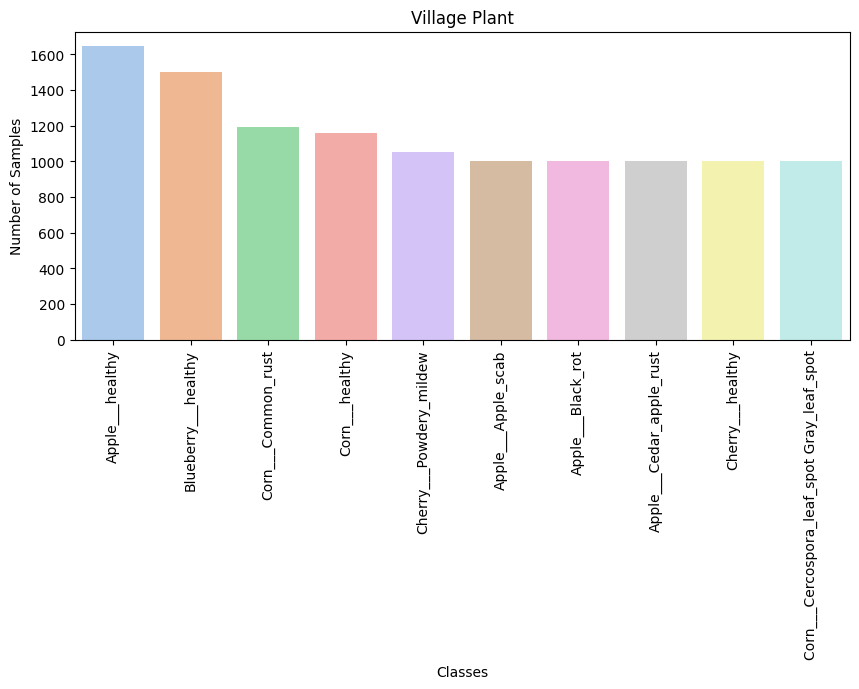

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(x="emotion", data=train, order=train['emotion'].value_counts().index, palette='pastel')

plt.xlabel("Classes")
plt.ylabel("Number of Samples")
plt.title('Village Plant')
plt.xticks(rotation=90)
plt.show()

## Part 2

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/Peach___Bacterial_spot.zip (Unzipped Files)"
list(f.name for f in os.scandir(path) if f.is_dir())

['Grape___healthy',
 'Grape___Esca_(Black_Measles)',
 'Corn___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Pepper,_bell___Bacterial_spot',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___healthy']

In [ ]:
# Define the paths to the train and test folders
train_folder = "/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/Peach___Bacterial_spot.zip (Unzipped Files)"

# Function to read images from a folder and reshape them
def read_and_reshape_images(folder_path):
    images = []
    labels = []
    id = []
    emotions = list(f.name for f in os.scandir(train_folder) if f.is_dir())

    for emotion in emotions:
        emotion_path = os.path.join(folder_path, emotion)
        for image_filename in os.listdir(emotion_path):
            image_path = os.path.join(emotion_path, image_filename)
            image = cv2.imread(image_path)
            resized_image = cv2.resize(image, (84, 84))
            resized_image = np.reshape(resized_image, (84, 84, 3))

            images.append(resized_image)
            labels.append(emotion)
            id.append(image_filename)

    return images, labels, id

# Read and reshape images from train and test folders
train_images, train_labels, train_ids = read_and_reshape_images(train_folder)

# Convert images and labels to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
train_ids = np.array(train_ids)

# Flatten images and convert pixel values to strings
train_pixels = [" ".join(map(str, image.flatten())) for image in train_images]

# Create DataFrames for train and test data
train_data = pd.DataFrame({"emotion": train_labels, "pixels": train_pixels, "ids": train_ids})

# Save train and test DataFrames to CSV files
train_data.to_csv("/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/2.csv", index=False)

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/2.csv")
train.head()

,emotion,pixels,ids
0,Grape___healthy,189 189 195 192 192 198 194 194 200 198 198 20...,image (61).JPG
1,Grape___healthy,172 171 181 172 171 181 170 169 179 172 171 18...,image (262).JPG
2,Grape___healthy,174 174 186 172 172 184 176 176 188 175 175 18...,image (154).JPG
3,Grape___healthy,167 168 181 177 178 191 185 186 200 182 183 19...,image (251).JPG
4,Grape___healthy,200 196 207 192 188 199 180 176 187 185 181 19...,image (332).JPG


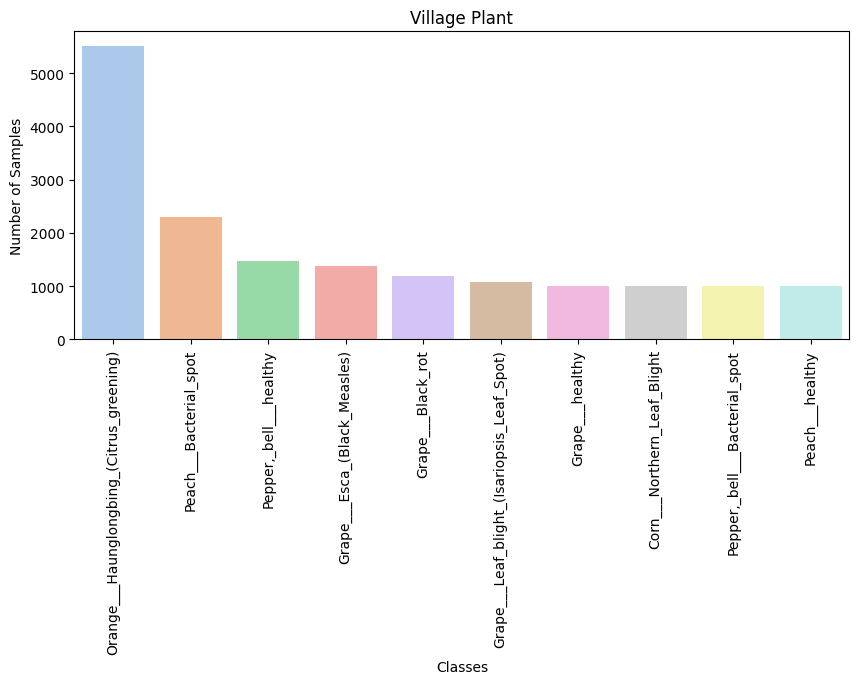

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(x="emotion", data=train, order=train['emotion'].value_counts().index, palette='pastel')

plt.xlabel("Classes")
plt.ylabel("Number of Samples")
plt.title('Village Plant')
plt.xticks(rotation=90)
plt.show()

# Part 3

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/Squash___Powdery_mildew.zip (Unzipped Files)"
list(f.name for f in os.scandir(path) if f.is_dir())

['Potato___Early_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Potato___Late_blight',
 'Strawberry___healthy',
 'Squash___Powdery_mildew',
 'Soybean___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot']

In [ ]:
# Define the paths to the train and test folders
train_folder = "/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/Squash___Powdery_mildew.zip (Unzipped Files)"

# Function to read images from a folder and reshape them
def read_and_reshape_images(folder_path):
    images = []
    labels = []
    id = []
    emotions = list(f.name for f in os.scandir(train_folder) if f.is_dir())

    for emotion in emotions:
        emotion_path = os.path.join(folder_path, emotion)
        for image_filename in os.listdir(emotion_path):
            image_path = os.path.join(emotion_path, image_filename)
            image = cv2.imread(image_path)
            resized_image = cv2.resize(image, (84, 84))
            resized_image = np.reshape(resized_image, (84, 84, 3))

            images.append(resized_image)
            labels.append(emotion)
            id.append(image_filename)

    return images, labels, id

# Read and reshape images from train and test folders
train_images, train_labels, train_ids = read_and_reshape_images(train_folder)

# Convert images and labels to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
train_ids = np.array(train_ids)

# Flatten images and convert pixel values to strings
train_pixels = [" ".join(map(str, image.flatten())) for image in train_images]

# Create DataFrames for train and test data
train_data = pd.DataFrame({"emotion": train_labels, "pixels": train_pixels, "ids": train_ids})

# Save train and test DataFrames to CSV files
train_data.to_csv("/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/3.csv", index=False)

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/3.csv")
train.head()

,emotion,pixels,ids
0,Potato___Early_blight,199 193 194 205 199 200 198 192 193 204 198 19...,image (4).JPG
1,Potato___Early_blight,163 159 165 167 163 169 169 165 171 160 156 16...,image (589).JPG
2,Potato___Early_blight,187 174 176 186 173 175 180 167 169 185 172 17...,image (132).JPG
3,Potato___Early_blight,129 115 121 146 132 138 132 119 124 125 111 11...,image (579).JPG
4,Potato___Early_blight,150 136 138 118 104 106 87 73 75 113 99 101 10...,image (951).JPG


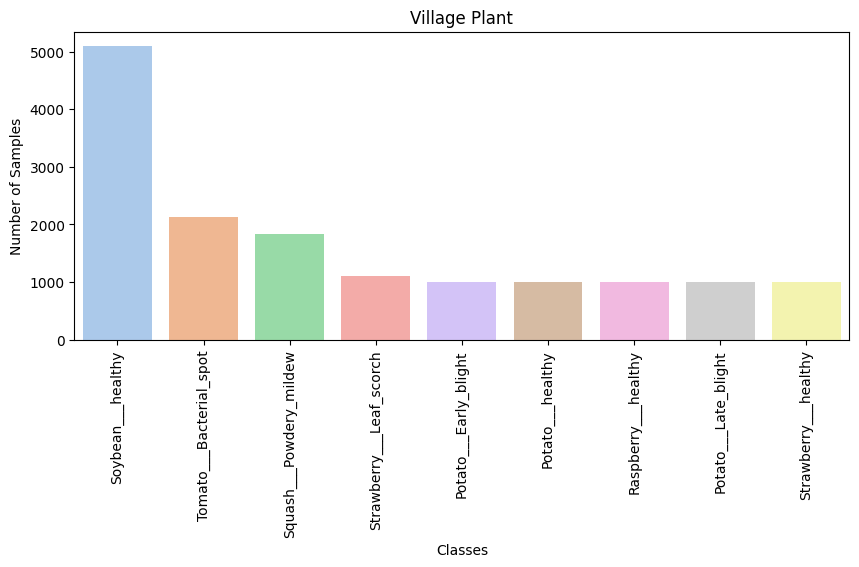

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(x="emotion", data=train, order=train['emotion'].value_counts().index, palette='pastel')

plt.xlabel("Classes")
plt.ylabel("Number of Samples")
plt.title('Village Plant')
plt.xticks(rotation=90)
plt.show()

# Part 4

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/Tomato___Early_blight.zip (Unzipped Files)"
list(f.name for f in os.scandir(path) if f.is_dir())

['Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus']

In [ ]:
# Define the paths to the train and test folders
train_folder = "/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/Tomato___Early_blight.zip (Unzipped Files)"

# Function to read images from a folder and reshape them
def read_and_reshape_images(folder_path):
    images = []
    labels = []
    id = []
    emotions = list(f.name for f in os.scandir(train_folder) if f.is_dir())

    for emotion in emotions:
        emotion_path = os.path.join(folder_path, emotion)
        for image_filename in os.listdir(emotion_path):
            image_path = os.path.join(emotion_path, image_filename)
            image = cv2.imread(image_path)
            resized_image = cv2.resize(image, (84, 84))
            resized_image = np.reshape(resized_image, (84, 84, 3))

            images.append(resized_image)
            labels.append(emotion)
            id.append(image_filename)

    return images, labels, id

# Read and reshape images from train and test folders
train_images, train_labels, train_ids = read_and_reshape_images(train_folder)

# Convert images and labels to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
train_ids = np.array(train_ids)

# Flatten images and convert pixel values to strings
train_pixels = [" ".join(map(str, image.flatten())) for image in train_images]

# Create DataFrames for train and test data
train_data = pd.DataFrame({"emotion": train_labels, "pixels": train_pixels, "ids": train_ids})

# Save train and test DataFrames to CSV files
train_data.to_csv("/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/4.csv", index=False)

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/4.csv")
train.head()

,emotion,pixels,ids
0,Tomato___Tomato_Yellow_Leaf_Curl_Virus,123 127 146 120 126 145 105 111 132 117 125 14...,image (4785).JPG
1,Tomato___Tomato_Yellow_Leaf_Curl_Virus,112 110 110 105 103 103 115 113 113 111 109 10...,image (4786).JPG
2,Tomato___Tomato_Yellow_Leaf_Curl_Virus,92 97 96 93 98 97 91 96 95 89 94 93 86 91 90 8...,image (4783).JPG
3,Tomato___Tomato_Yellow_Leaf_Curl_Virus,125 120 131 131 125 136 128 122 133 145 139 15...,image (4784).JPG
4,Tomato___Tomato_Yellow_Leaf_Curl_Virus,170 179 176 157 166 163 157 166 163 165 174 17...,image (4782).JPG


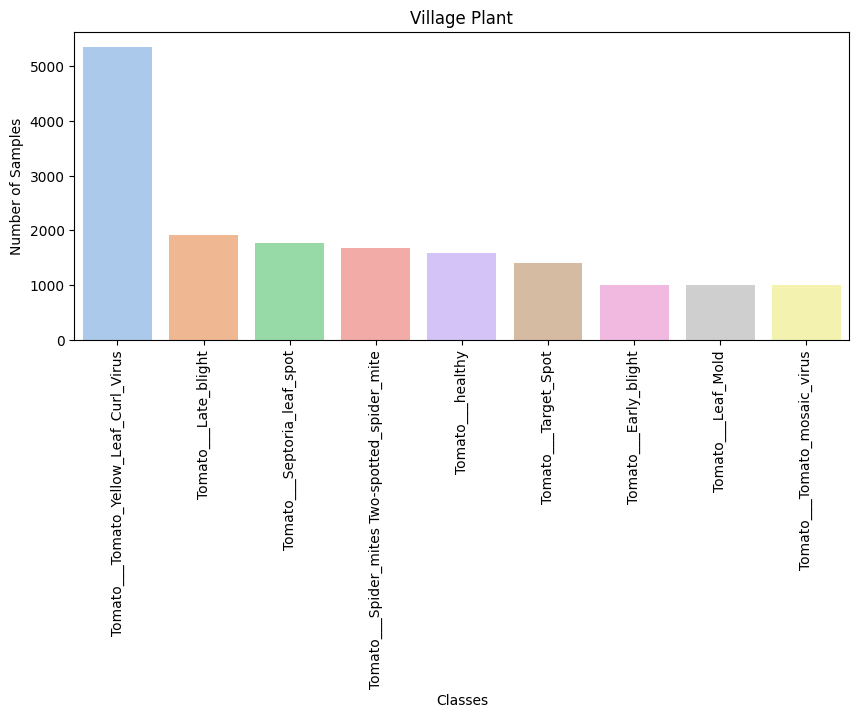

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(x="emotion", data=train, order=train['emotion'].value_counts().index, palette='pastel')

plt.xlabel("Classes")
plt.ylabel("Number of Samples")
plt.title('Village Plant')
plt.xticks(rotation=90)
plt.show()

# Combining Data

In [ ]:
import pandas as pd

path1 = "/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/1.csv"
path2 = "/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/2.csv"
path3 = "/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/3.csv"
path4 = "/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/4.csv"

split1 = pd.read_csv(path1)
print(split1.shape[0])
split2 = pd.read_csv(path2)
print(split2.shape[0])
merged1 = pd.concat([split1, split2])
print(merged1.shape[0])

del split1
del split2

11553
16921
28474


In [ ]:
split3 = pd.read_csv(path3)
print(split3.shape[0])
split4 = pd.read_csv(path4)
print(split4.shape[0])

merged2 = pd.concat([split3, split4])
print(merged2.shape[0])

del split3, split4

15161
16708
31869


In [ ]:
merged_path1 = "/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/merged1.csv"
merged_path2 = "/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/merged2.csv"

# merged1.to_csv(merged_path1, index=False)
# merged2.to_csv(merged_path2, index=False)

merged1 = pd.read_csv(merged_path1)
merged2 = pd.read_csv(merged_path2)

In [ ]:
final_path = "/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/final.csv"

final = pd.concat([merged1, merged2])
final.to_csv(final_path, index=False)

del merged1, merged2

In [ ]:
final.shape

(60343, 3)